<a href="https://colab.research.google.com/github/abdulwaheedTMU/Project3/blob/main/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA

In [1]:
# Mount Google Drive (if needed)
from google.colab import drive
import os
drive.mount('/content/drive')

# Install required packages (if not already installed)
!pip install ultralytics opencv-python pillow torch torchvision


Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 31.4 MB/s eta 0:00:00


Step 1

Step 1: Original image loaded successfully.
Step 2: Image converted to grayscale and blurred.
Grayscale image saved as: grayscale_image_20241213_215034.jpeg
Step 3: Threshold applied to separate PCB from background.
Thresholded image saved as: thresholded_image_20241213_215035.jpeg
Step 4: 4703 contours found. Selecting the largest one.
Step 5: Mask created based on the largest contour.
Mask image saved as: mask_image_20241213_215035.jpeg
Step 6: PCB extracted using the mask.
Extracted image saved as: extracted_image_20241213_215035.jpeg


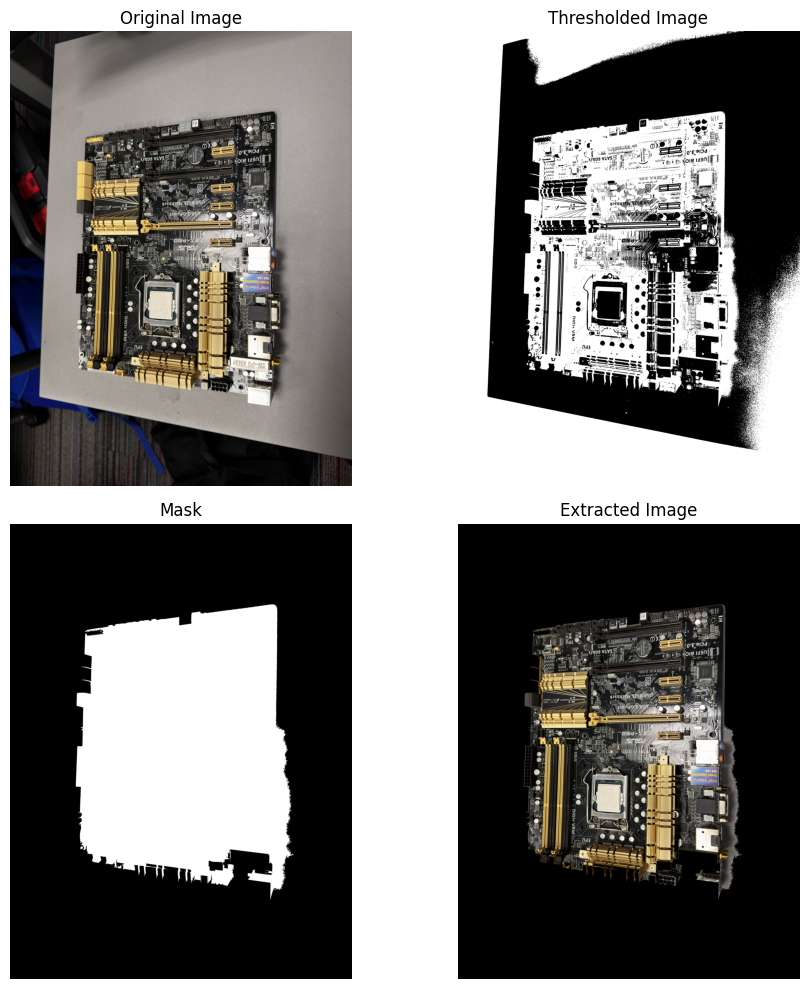

Final Summary:
Original Image Shape: (5792, 4344, 3)
Extracted Image Shape: (5792, 4344, 3)
Mask Dimensions: (5792, 4344)
Number of Contours Found: 4703


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt  # For displaying images in Colab or non-GUI environments
import os
from datetime import datetime

# Function to generate unique filenames
def generate_unique_filename(base_name, extension="jpeg"):
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    return f"{base_name}_{timestamp}.{extension}"

# Define output directory for saving images
output_dir = '/content/drive/MyDrive/Project3Data/step1/'
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist

# Path to your motherboard image (adjust as needed)
image_path = '/content/drive/MyDrive/Project3Data/motherboard_image.JPEG'

# Read the image
img = cv2.imread(image_path)
if img is None:
    print("Error: Could not read the image. Check the image_path.")
else:
    print("Step 1: Original image loaded successfully.")

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply Gaussian Blur to smooth the image and reduce noise
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    print("Step 2: Image converted to grayscale and blurred.")

    # Save the grayscale image
    gray_filename = generate_unique_filename("grayscale_image", "jpeg")
    cv2.imwrite(os.path.join(output_dir, gray_filename), gray)
    print(f"Grayscale image saved as: {gray_filename}")

    # Apply threshold (adjust threshold value as needed)
    _, thresh = cv2.threshold(gray, 125, 255, cv2.THRESH_BINARY_INV)
    print("Step 3: Threshold applied to separate PCB from background.")

    # Save the thresholded image
    thresh_filename = generate_unique_filename("thresholded_image", "jpeg")
    cv2.imwrite(os.path.join(output_dir, thresh_filename), thresh)
    print(f"Thresholded image saved as: {thresh_filename}")

    #min_contour_area = 2000  # Adjust based on your image
    #filtered_contours = [c for c in contours if cv2.contourArea(c) > min_contour_area]

    # Find contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) == 0:
        print("No contours found. Try adjusting the threshold or preprocessing steps.")
    else:
        print(f"Step 4: {len(contours)} contours found. Selecting the largest one.")
        # Find the largest contour assuming the PCB is the largest object
        largest_contour = max(contours, key=cv2.contourArea)

        # Create a mask based on the largest contour
        mask = np.zeros_like(gray)
        cv2.drawContours(mask, [largest_contour], -1, 255, -1)
        print("Step 5: Mask created based on the largest contour.")

        # Save the mask image
        mask_filename = generate_unique_filename("mask_image", "jpeg")
        cv2.imwrite(os.path.join(output_dir, mask_filename), mask)
        print(f"Mask image saved as: {mask_filename}")

        # Extract the PCB using bitwise_and
        mask_3ch = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
        extracted = cv2.bitwise_and(img, mask_3ch)
        print("Step 6: PCB extracted using the mask.")

        # Save the extracted image
        extracted_filename = generate_unique_filename("extracted_image", "jpeg")
        cv2.imwrite(os.path.join(output_dir, extracted_filename), extracted)
        print(f"Extracted image saved as: {extracted_filename}")

        # Display results
        fig, axs = plt.subplots(2, 2, figsize=(10, 10))
        axs[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[0, 0].set_title("Original Image")
        axs[0, 0].axis("off")

        axs[0, 1].imshow(thresh, cmap="gray")
        axs[0, 1].set_title("Thresholded Image")
        axs[0, 1].axis("off")

        axs[1, 0].imshow(mask, cmap="gray")
        axs[1, 0].set_title("Mask")
        axs[1, 0].axis("off")

        axs[1, 1].imshow(cv2.cvtColor(extracted, cv2.COLOR_BGR2RGB))
        axs[1, 1].set_title("Extracted Image")
        axs[1, 1].axis("off")

        plt.tight_layout()
        plt.show()

        # Print final result summary
        print("Final Summary:")
        print(f"Original Image Shape: {img.shape}")
        print(f"Extracted Image Shape: {extracted.shape}")
        print(f"Mask Dimensions: {mask.shape}")
        print(f"Number of Contours Found: {len(contours)}")


In [2]:
from ultralytics import YOLO

# If you have YOLOv8 installed already, just proceed:
model = YOLO('yolov8n.pt')  # Using the nano model as recommended

# Set paths and parameters
data_path = '/content/drive/MyDrive/Project3Data/data/data.yaml'  # Replace with your data.yaml path
epochs = 140      # Adjust based on your hardware and dataset
batch_size = 8     # Adjust based on your GPU memory
img_size = 900     # Recommended minimum image size

# Train the model
model.train(
    data=data_path,
    epochs=epochs,
    batch=batch_size,
    imgsz=img_size,
    name='pcb_component_detector'
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 165MB/s]


Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Project3Data/data/data.yaml, epochs=140, time=None, patience=100, batch=8, imgsz=900, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=pcb_component_detector, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sho

100%|██████████| 755k/755k [00:00<00:00, 41.0MB/s]


Overriding model.yaml nc=80 with nc=13

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 168MB/s]


AMP: checks passed ✅
WARNING ⚠️ imgsz=[900] must be multiple of max stride 32, updating to [928]


train: Scanning /content/drive/MyDrive/Project3Data/data/train/labels.cache... 544 images, 0 backgrounds, 0 corrupt: 100%|██████████| 544/544 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 26, len(boxes) = 108783. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/Project3Data/data/valid/labels.cache... 105 images, 0 backgrounds, 0 corrupt: 100%|██████████| 105/105 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 26, len(boxes) = 19108. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/pcb_component_detector/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 928 train, 928 val
Using 2 dataloader workers
Logging results to runs/detect/pcb_component_detector
Starting training for 140 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/140      8.59G      2.176      4.204      1.252       3204        928: 100%|██████████| 68/68 [00:42<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.27s/it]

                   all        105      19108      0.836     0.0524     0.0498     0.0257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/140      11.3G      2.249      3.129      1.133       1389        928: 100%|██████████| 68/68 [00:35<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]

                   all        105      19108      0.616     0.0884     0.0642      0.035



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/140      10.2G       2.24      2.686      1.104       2324        928: 100%|██████████| 68/68 [00:35<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]

                   all        105      19108      0.496      0.111      0.103     0.0575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/140      13.7G       2.16      2.379      1.088       1971        928: 100%|██████████| 68/68 [00:36<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]

                   all        105      19108      0.501      0.147      0.135     0.0813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/140      15.3G        2.1      2.213      1.083       3191        928: 100%|██████████| 68/68 [00:35<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.49it/s]

                   all        105      19108      0.551      0.149      0.158     0.0935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/140      14.9G      2.081      2.071      1.062       2516        928: 100%|██████████| 68/68 [00:35<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.13s/it]

                   all        105      19108      0.387      0.193      0.165      0.098



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/140      11.3G      2.043      1.984       1.06       2771        928: 100%|██████████| 68/68 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.01it/s]

                   all        105      19108      0.551      0.237      0.204      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/140      8.11G      1.996       1.92      1.048       3077        928: 100%|██████████| 68/68 [00:35<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.34it/s]

                   all        105      19108      0.535      0.251      0.216      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/140      13.8G      1.981       1.82      1.041       2692        928: 100%|██████████| 68/68 [00:39<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.08s/it]

                   all        105      19108       0.54      0.249      0.233      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/140      12.5G      1.961      1.822      1.037       2514        928: 100%|██████████| 68/68 [00:35<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]

                   all        105      19108      0.539      0.287      0.241      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/140      8.59G      1.906      1.731      1.028       1788        928: 100%|██████████| 68/68 [00:35<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.39it/s]

                   all        105      19108      0.594      0.271      0.274      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/140      8.89G      1.879      1.701       1.02       1719        928: 100%|██████████| 68/68 [00:35<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.03s/it]

                   all        105      19108      0.549      0.278      0.262      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/140      10.1G       1.89      1.694      1.023       1873        928: 100%|██████████| 68/68 [00:34<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.25it/s]

                   all        105      19108      0.519      0.311      0.272      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/140      12.2G      1.878      1.653      1.019       1666        928: 100%|██████████| 68/68 [00:38<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]

                   all        105      19108       0.65      0.297      0.328      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/140      10.7G      1.834      1.607      1.009       2992        928: 100%|██████████| 68/68 [00:35<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.25s/it]

                   all        105      19108      0.635      0.308      0.328      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/140      11.4G      1.838      1.587      1.002       2525        928: 100%|██████████| 68/68 [00:35<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.32it/s]

                   all        105      19108      0.614      0.328      0.329      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/140      14.6G      1.845      1.574       1.01       2154        928: 100%|██████████| 68/68 [00:35<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]

                   all        105      19108      0.616      0.338      0.365      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/140      14.4G        1.8      1.538     0.9981       2506        928: 100%|██████████| 68/68 [00:34<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:09<00:00,  1.31s/it]

                   all        105      19108      0.589       0.34      0.368      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/140      7.94G      1.809      1.514     0.9951       2361        928: 100%|██████████| 68/68 [00:37<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.41it/s]

                   all        105      19108       0.58      0.353      0.382      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/140      11.8G      1.813       1.52      1.002       2351        928: 100%|██████████| 68/68 [00:36<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.02it/s]

                   all        105      19108      0.653      0.365      0.397      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/140      9.82G       1.75      1.489     0.9873       3244        928: 100%|██████████| 68/68 [00:35<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]

                   all        105      19108      0.612      0.373      0.406      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/140      10.2G      1.786      1.475     0.9931       1753        928: 100%|██████████| 68/68 [00:35<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.54it/s]

                   all        105      19108      0.534      0.402      0.413      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/140      15.4G      1.757      1.452     0.9924       2372        928: 100%|██████████| 68/68 [00:36<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.16s/it]

                   all        105      19108      0.452      0.411      0.404      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/140      12.5G      1.791      1.467     0.9948       1938        928: 100%|██████████| 68/68 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.00s/it]

                   all        105      19108      0.505      0.405      0.429      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/140      13.7G      1.741      1.433     0.9816       2002        928: 100%|██████████| 68/68 [00:36<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.43it/s]

                   all        105      19108      0.663      0.369      0.426       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/140      11.7G      1.766      1.428     0.9832       2090        928: 100%|██████████| 68/68 [00:35<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.33it/s]

                   all        105      19108      0.562      0.448      0.462      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/140      12.8G      1.761      1.397     0.9798       2736        928: 100%|██████████| 68/68 [00:35<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.08s/it]

                   all        105      19108      0.588      0.424       0.45      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/140      15.6G      1.714      1.387     0.9797       1994        928: 100%|██████████| 68/68 [00:37<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.03s/it]

                   all        105      19108      0.703      0.401      0.484      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/140      13.5G      1.734      1.385     0.9768       2684        928: 100%|██████████| 68/68 [00:36<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.52it/s]

                   all        105      19108      0.546       0.43      0.456      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/140      15.2G      1.709      1.364     0.9804       2910        928: 100%|██████████| 68/68 [00:35<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.01it/s]

                   all        105      19108      0.535      0.456      0.473      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/140      13.9G      1.719      1.377     0.9745       3155        928: 100%|██████████| 68/68 [00:35<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]

                   all        105      19108      0.647      0.445      0.501      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/140      9.49G      1.692      1.319     0.9697       2513        928: 100%|██████████| 68/68 [00:35<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.47it/s]

                   all        105      19108      0.526      0.482      0.509      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/140      11.6G      1.682      1.316     0.9737       2120        928: 100%|██████████| 68/68 [00:37<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.01it/s]

                   all        105      19108      0.569      0.494      0.516       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/140       9.5G      1.707      1.333     0.9726       3431        928: 100%|██████████| 68/68 [00:35<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]

                   all        105      19108      0.577      0.478      0.505      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/140      9.15G      1.675      1.295     0.9648       1979        928: 100%|██████████| 68/68 [00:36<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.58it/s]

                   all        105      19108      0.558      0.524      0.515      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/140      9.72G      1.695      1.307     0.9674       3917        928: 100%|██████████| 68/68 [00:35<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.40it/s]

                   all        105      19108      0.584      0.478      0.508      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/140      13.4G      1.696      1.288     0.9622       3399        928: 100%|██████████| 68/68 [00:35<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]

                   all        105      19108      0.638      0.491      0.533      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/140      8.41G      1.688        1.3      0.971       2605        928: 100%|██████████| 68/68 [00:37<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]

                   all        105      19108        0.6      0.434      0.489      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/140      14.5G      1.669      1.278     0.9603       3151        928: 100%|██████████| 68/68 [00:36<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]

                   all        105      19108      0.602      0.517      0.539      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/140      12.9G      1.646      1.252     0.9625       2274        928: 100%|██████████| 68/68 [00:35<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]

                   all        105      19108      0.562      0.536      0.549      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/140      14.8G      1.677      1.258     0.9672       1662        928: 100%|██████████| 68/68 [00:35<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.47it/s]

                   all        105      19108      0.669      0.492      0.548      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/140      8.58G      1.678      1.254     0.9645       1855        928: 100%|██████████| 68/68 [00:36<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]

                   all        105      19108      0.598      0.553      0.566      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/140       6.7G      1.656      1.244     0.9615       2491        928: 100%|██████████| 68/68 [00:35<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.15s/it]

                   all        105      19108       0.62       0.52      0.564      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/140      15.4G      1.644      1.209     0.9587       1961        928: 100%|██████████| 68/68 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]

                   all        105      19108      0.683      0.532      0.592      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/140      7.59G      1.643      1.228     0.9616       2540        928: 100%|██████████| 68/68 [00:36<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]

                   all        105      19108      0.622      0.519      0.556      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/140      9.91G      1.633       1.21     0.9549       1876        928: 100%|██████████| 68/68 [00:35<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]

                   all        105      19108      0.644      0.553        0.6      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/140      14.1G      1.655      1.223     0.9557       1912        928: 100%|██████████| 68/68 [00:34<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.02s/it]

                   all        105      19108      0.612      0.544      0.578      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/140      7.36G      1.614      1.194      0.956       2548        928: 100%|██████████| 68/68 [00:36<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.41it/s]

                   all        105      19108      0.684      0.544        0.6      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/140      14.2G      1.631      1.192     0.9527       1871        928: 100%|██████████| 68/68 [00:37<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.44it/s]

                   all        105      19108       0.65      0.566      0.604      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/140      8.56G      1.593      1.178     0.9515       1229        928: 100%|██████████| 68/68 [00:35<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.03it/s]

                   all        105      19108      0.651      0.504      0.566      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/140      8.43G      1.622      1.186     0.9465       2287        928: 100%|██████████| 68/68 [00:36<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        105      19108      0.644      0.554      0.578      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/140      11.7G        1.6       1.17     0.9477       2474        928: 100%|██████████| 68/68 [00:36<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.58it/s]

                   all        105      19108      0.666      0.568       0.61      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/140      13.7G       1.59      1.161     0.9455       2663        928: 100%|██████████| 68/68 [00:36<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.35it/s]

                   all        105      19108      0.652      0.553      0.605      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/140      12.2G      1.625      1.172     0.9504       2627        928: 100%|██████████| 68/68 [00:40<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.31it/s]

                   all        105      19108      0.685      0.586      0.621      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/140      14.6G      1.589      1.139     0.9412       1689        928: 100%|██████████| 68/68 [00:36<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        105      19108      0.661      0.577      0.611      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/140      13.1G      1.573      1.134     0.9463       2460        928: 100%|██████████| 68/68 [00:36<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.38it/s]

                   all        105      19108      0.637      0.562        0.6      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/140      7.67G      1.563       1.15     0.9426       2079        928: 100%|██████████| 68/68 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]

                   all        105      19108      0.707      0.563       0.62      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/140      13.9G      1.563      1.117      0.941       2002        928: 100%|██████████| 68/68 [00:36<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.52it/s]

                   all        105      19108      0.679      0.587      0.623      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/140      12.9G      1.555       1.12     0.9382       2719        928: 100%|██████████| 68/68 [00:38<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]

                   all        105      19108       0.69      0.595      0.638      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/140      15.2G      1.591      1.145     0.9379       2188        928: 100%|██████████| 68/68 [00:36<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]

                   all        105      19108      0.668      0.591      0.629      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/140      8.19G      1.577      1.136     0.9354       2062        928: 100%|██████████| 68/68 [00:36<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]

                   all        105      19108      0.693      0.567      0.624      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/140        15G      1.582      1.112     0.9413       1933        928: 100%|██████████| 68/68 [00:35<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.38it/s]

                   all        105      19108      0.743      0.604      0.652      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/140      11.3G      1.597      1.135     0.9461       2162        928: 100%|██████████| 68/68 [00:36<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.57it/s]

                   all        105      19108      0.675      0.597      0.639      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/140      10.5G      1.571      1.109     0.9385       2047        928: 100%|██████████| 68/68 [00:40<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]

                   all        105      19108      0.742      0.597      0.658      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/140      11.3G      1.566      1.108     0.9358       1125        928: 100%|██████████| 68/68 [00:36<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]

                   all        105      19108      0.737      0.615      0.662      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/140      12.5G      1.586       1.11     0.9396       1664        928: 100%|██████████| 68/68 [00:36<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]

                   all        105      19108      0.735       0.62      0.672      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/140      8.91G      1.552      1.085     0.9373       2153        928: 100%|██████████| 68/68 [00:36<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]

                   all        105      19108      0.732      0.604      0.667      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/140      15.3G      1.555      1.091     0.9314       2158        928: 100%|██████████| 68/68 [00:35<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]

                   all        105      19108      0.762      0.595       0.67      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/140      11.5G      1.549      1.069     0.9351       3188        928: 100%|██████████| 68/68 [00:38<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.42it/s]

                   all        105      19108      0.778      0.629       0.68      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/140       7.1G      1.583      1.082     0.9349       2943        928: 100%|██████████| 68/68 [00:35<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]

                   all        105      19108      0.727      0.623      0.673      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/140      7.54G      1.561      1.084     0.9375       3792        928: 100%|██████████| 68/68 [00:35<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.58it/s]

                   all        105      19108      0.747       0.62      0.675      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/140      8.64G       1.53      1.065     0.9343       1673        928: 100%|██████████| 68/68 [00:36<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        105      19108      0.712      0.615      0.673      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/140      12.3G      1.564      1.077     0.9327       1396        928: 100%|██████████| 68/68 [00:36<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]

                   all        105      19108      0.745      0.624       0.68      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/140      10.7G      1.529      1.058     0.9296       2565        928: 100%|██████████| 68/68 [00:39<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.48it/s]

                   all        105      19108      0.791      0.618      0.691      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/140      13.8G      1.545      1.068      0.938       1992        928: 100%|██████████| 68/68 [00:36<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]

                   all        105      19108      0.737      0.627      0.669      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/140        13G      1.534      1.054     0.9302       1638        928: 100%|██████████| 68/68 [00:35<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.51it/s]

                   all        105      19108      0.787      0.629      0.693      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/140      13.5G      1.537      1.071     0.9284       2489        928: 100%|██████████| 68/68 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]

                   all        105      19108       0.75      0.611      0.678      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/140      12.9G      1.534      1.053      0.929       2415        928: 100%|██████████| 68/68 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.51it/s]

                   all        105      19108      0.752      0.634      0.681      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/140      13.3G      1.535      1.052     0.9319       1806        928: 100%|██████████| 68/68 [00:35<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.33it/s]

                   all        105      19108      0.779      0.638      0.684      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/140        14G      1.519      1.039     0.9268       2319        928: 100%|██████████| 68/68 [00:36<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.32it/s]

                   all        105      19108      0.741      0.623      0.686      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/140        12G      1.533      1.041     0.9277       1666        928: 100%|██████████| 68/68 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.02it/s]

                   all        105      19108       0.75      0.633      0.688       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/140      12.5G      1.504      1.025     0.9267       2258        928: 100%|██████████| 68/68 [00:35<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.50it/s]

                   all        105      19108      0.738      0.648      0.686      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/140      11.1G      1.496      1.026     0.9233       1901        928: 100%|██████████| 68/68 [00:36<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]

                   all        105      19108      0.759      0.634      0.693      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/140      15.6G        1.5      1.028     0.9272       3288        928: 100%|██████████| 68/68 [00:35<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]

                   all        105      19108      0.797      0.634      0.695      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/140      11.9G      1.543      1.038     0.9308       2221        928: 100%|██████████| 68/68 [00:37<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]

                   all        105      19108      0.805      0.628      0.692      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/140      14.3G      1.479      1.003     0.9172       2629        928: 100%|██████████| 68/68 [00:35<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.58it/s]

                   all        105      19108      0.787      0.623      0.695      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/140      12.5G      1.514      1.013     0.9222       2089        928: 100%|██████████| 68/68 [00:36<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.56it/s]

                   all        105      19108      0.794      0.632      0.698      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/140      12.9G      1.493      1.017     0.9206       1925        928: 100%|██████████| 68/68 [00:35<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]

                   all        105      19108      0.804       0.63      0.701      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/140      8.35G      1.505      1.028     0.9218       3061        928: 100%|██████████| 68/68 [00:35<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.43it/s]

                   all        105      19108      0.782      0.643      0.701      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/140      12.6G      1.522      1.018     0.9226       3430        928: 100%|██████████| 68/68 [00:38<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]

                   all        105      19108      0.811      0.631      0.706      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/140      11.1G      1.506      1.008     0.9237       2755        928: 100%|██████████| 68/68 [00:35<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.45it/s]

                   all        105      19108        0.8      0.639      0.701      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/140      13.6G      1.501      1.019     0.9222       2819        928: 100%|██████████| 68/68 [00:35<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]

                   all        105      19108      0.812      0.643      0.706        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/140      15.5G      1.488     0.9986     0.9206       1953        928: 100%|██████████| 68/68 [00:35<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.54it/s]

                   all        105      19108      0.825      0.634      0.714      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/140      14.6G      1.481      1.005     0.9158       2265        928: 100%|██████████| 68/68 [00:35<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        105      19108      0.859      0.622      0.716      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/140      7.82G      1.475      0.992     0.9192       2015        928: 100%|██████████| 68/68 [00:35<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]

                   all        105      19108      0.816      0.645      0.717      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/140      12.2G      1.475     0.9936     0.9211       2548        928: 100%|██████████| 68/68 [00:36<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]

                   all        105      19108      0.823       0.64      0.716      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/140       7.5G      1.484     0.9976     0.9129       2596        928: 100%|██████████| 68/68 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.29it/s]

                   all        105      19108      0.812      0.645      0.713      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/140       8.3G      1.457     0.9736     0.9143        967        928: 100%|██████████| 68/68 [00:35<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        105      19108      0.828      0.646      0.721      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/140      12.5G      1.451      0.976     0.9133       2314        928: 100%|██████████| 68/68 [00:35<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]

                   all        105      19108      0.822      0.653      0.723      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/140      7.35G      1.469     0.9763     0.9138       2209        928: 100%|██████████| 68/68 [00:36<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]

                   all        105      19108       0.84      0.636      0.716      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/140      11.9G      1.451     0.9678     0.9178       2119        928: 100%|██████████| 68/68 [00:38<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.58it/s]

                   all        105      19108       0.81      0.641      0.716      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/140        12G      1.471     0.9811     0.9114       1567        928: 100%|██████████| 68/68 [00:35<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        105      19108      0.817      0.657      0.722      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/140      10.5G       1.44     0.9568     0.9138       1550        928: 100%|██████████| 68/68 [00:36<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.45it/s]

                   all        105      19108      0.819      0.658      0.727      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/140      12.1G      1.447     0.9542     0.9152       2376        928: 100%|██████████| 68/68 [00:35<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]

                   all        105      19108      0.812      0.648      0.723      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/140      12.2G      1.466     0.9655     0.9106       1913        928: 100%|██████████| 68/68 [00:35<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        105      19108      0.819      0.649       0.72       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/140      12.8G      1.447      0.968      0.913       3380        928: 100%|██████████| 68/68 [00:38<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]

                   all        105      19108      0.785      0.672      0.725      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/140      13.2G       1.48     0.9819     0.9109       2613        928: 100%|██████████| 68/68 [00:35<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]

                   all        105      19108      0.821      0.663       0.73      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/140      14.7G      1.459      0.966     0.9149       1926        928: 100%|██████████| 68/68 [00:35<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.47it/s]

                   all        105      19108      0.818      0.662       0.73      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/140      9.71G      1.465     0.9678     0.9103       1760        928: 100%|██████████| 68/68 [00:35<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]

                   all        105      19108      0.817      0.654      0.724       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/140      7.25G      1.442     0.9542     0.9124       1423        928: 100%|██████████| 68/68 [00:36<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.44it/s]

                   all        105      19108      0.823      0.661      0.731      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/140      11.9G       1.45     0.9451     0.9145       2681        928: 100%|██████████| 68/68 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]

                   all        105      19108      0.834      0.663      0.735      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/140      12.7G      1.446     0.9428     0.9112       1957        928: 100%|██████████| 68/68 [00:39<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        105      19108      0.835      0.657      0.732      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/140      15.6G      1.416     0.9491     0.9077       2688        928: 100%|██████████| 68/68 [00:36<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]

                   all        105      19108      0.813      0.659      0.729      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/140      10.6G       1.44     0.9513     0.9135       2031        928: 100%|██████████| 68/68 [00:35<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]

                   all        105      19108      0.819      0.665      0.733      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/140      7.95G      1.453     0.9505     0.9121       2481        928: 100%|██████████| 68/68 [00:36<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        105      19108      0.808      0.667      0.734      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/140      13.5G      1.442     0.9464      0.911       1375        928: 100%|██████████| 68/68 [00:36<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]

                   all        105      19108      0.825      0.658      0.731      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/140      9.32G      1.425      0.932     0.9047       2685        928: 100%|██████████| 68/68 [00:38<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.40it/s]

                   all        105      19108      0.845      0.662       0.73       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/140      14.3G      1.448     0.9444      0.911       1437        928: 100%|██████████| 68/68 [00:34<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]

                   all        105      19108      0.807      0.666      0.732      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/140      15.4G      1.434     0.9404     0.9096       2683        928: 100%|██████████| 68/68 [00:36<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        105      19108      0.808      0.665      0.733      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/140      7.52G      1.444      0.945     0.9096       2379        928: 100%|██████████| 68/68 [00:36<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        105      19108      0.831      0.658      0.732      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/140      11.5G      1.437     0.9389     0.9051       2574        928: 100%|██████████| 68/68 [00:36<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.31it/s]

                   all        105      19108      0.851      0.654      0.735      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/140      13.2G      1.423     0.9311     0.9083       1538        928: 100%|██████████| 68/68 [00:35<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]

                   all        105      19108      0.827       0.66      0.739      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/140      9.84G      1.449      0.949     0.9116       3610        928: 100%|██████████| 68/68 [00:37<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        105      19108      0.849      0.656      0.734       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/140      14.7G      1.418     0.9257      0.903       1970        928: 100%|██████████| 68/68 [00:36<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]

                   all        105      19108      0.827      0.673      0.737       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/140      6.66G      1.413     0.9246     0.9055       2598        928: 100%|██████████| 68/68 [00:34<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]

                   all        105      19108      0.831      0.668      0.738      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/140      10.5G      1.421     0.9133     0.9042       2020        928: 100%|██████████| 68/68 [00:34<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.33it/s]

                   all        105      19108      0.849      0.661      0.739      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/140        12G      1.413      0.922     0.9019       1742        928: 100%|██████████| 68/68 [00:36<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]

                   all        105      19108      0.846       0.66      0.737      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/140       7.8G      1.415     0.9264     0.9048       2155        928: 100%|██████████| 68/68 [00:39<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.32it/s]

                   all        105      19108      0.819      0.667      0.738      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/140      15.4G      1.418     0.9269      0.901       2316        928: 100%|██████████| 68/68 [00:35<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]

                   all        105      19108      0.866      0.652      0.741      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/140      9.12G       1.43      0.932     0.9048       2188        928: 100%|██████████| 68/68 [00:36<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        105      19108      0.865      0.652      0.738      0.533


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/140      8.77G      1.448     0.9795     0.9182       1362        928: 100%|██████████| 68/68 [00:37<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.56it/s]

                   all        105      19108      0.822      0.648      0.729      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/140      10.9G      1.428     0.9493     0.9072       1299        928: 100%|██████████| 68/68 [00:33<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.43it/s]

                   all        105      19108       0.82      0.647      0.728      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/140       6.9G      1.448     0.9435     0.9122       1141        928: 100%|██████████| 68/68 [00:34<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]

                   all        105      19108      0.785      0.669      0.728      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/140      7.61G      1.416      0.925     0.9085       1311        928: 100%|██████████| 68/68 [00:32<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]

                   all        105      19108       0.83      0.642      0.728      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/140      6.28G      1.423     0.9199     0.9071       1465        928: 100%|██████████| 68/68 [00:32<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]

                   all        105      19108      0.851      0.639      0.733      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/140      7.16G      1.415     0.9198     0.9038       1396        928: 100%|██████████| 68/68 [00:33<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]

                   all        105      19108      0.821      0.654      0.734      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/140      8.86G      1.405     0.9119     0.9052       1442        928: 100%|██████████| 68/68 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]

                   all        105      19108      0.836      0.648      0.735      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/140      9.66G      1.397     0.9045      0.903        913        928: 100%|██████████| 68/68 [00:35<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        105      19108      0.845      0.648      0.737      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/140      10.3G      1.412     0.9138      0.902       2535        928: 100%|██████████| 68/68 [00:37<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        105      19108      0.826      0.656      0.733      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/140      12.3G      1.398     0.9013     0.9042        799        928: 100%|██████████| 68/68 [00:35<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        105      19108      0.833      0.649      0.734       0.53



140 epochs completed in 1.668 hours.
Optimizer stripped from runs/detect/pcb_component_detector/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/pcb_component_detector/weights/best.pt, 6.3MB

Validating runs/detect/pcb_component_detector/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,008,183 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:25<00:00,  3.64s/it]


                   all        105      19108      0.866      0.653      0.741      0.538
                Button         14         45      0.869          1      0.985      0.808
             Capacitor        104       7251      0.815      0.407       0.58      0.307
             Connector         76        659      0.853      0.892      0.918      0.707
                 Diode         11         53       0.92      0.434      0.536       0.39
Electrolytic Capacitor         15        160      0.883      0.894      0.959      0.715
                    IC         95       1322      0.853      0.909      0.936      0.713
              Inductor         12         45       0.93      0.556      0.686      0.531
                   Led         18        127      0.857      0.677      0.758      0.544
                  Pads         20        143      0.837      0.196      0.297      0.195
                  Pins         10        151      0.835      0.775      0.879      0.625
              Resisto

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79398529cbe0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.04504

Step 3


image 1/1 /content/drive/MyDrive/Project3Data/data/evaluation/ardmega.jpg: 832x928 1 Button, 9 Capacitors, 6 Connectors, 2 Electrolytic Capacitors, 7 ICs, 17 Resistors, 13.0ms
Speed: 7.5ms preprocess, 13.0ms inference, 2.0ms postprocess per image at shape (1, 3, 832, 928)
Results saved to runs/detect/pcb_component_detector25


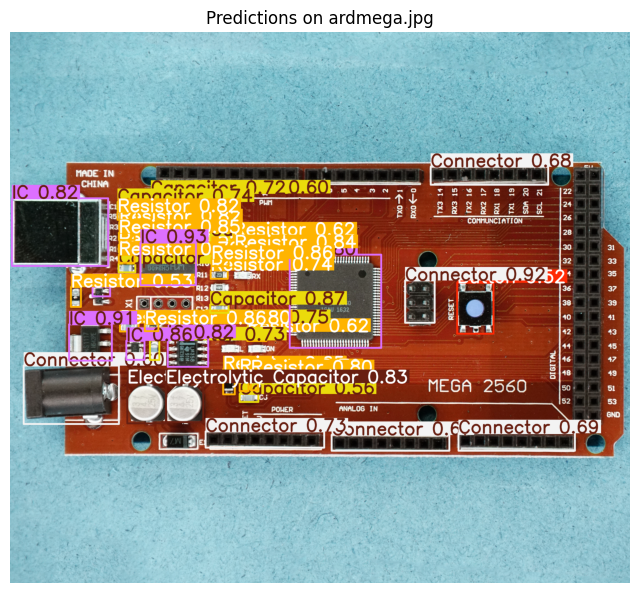


image 1/1 /content/drive/MyDrive/Project3Data/data/evaluation/arduno.jpg: 640x928 8 Capacitors, 9 Connectors, 2 Electrolytic Capacitors, 5 ICs, 1 Led, 9 Resistors, 10.4ms
Speed: 6.6ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 928)
Results saved to runs/detect/pcb_component_detector26


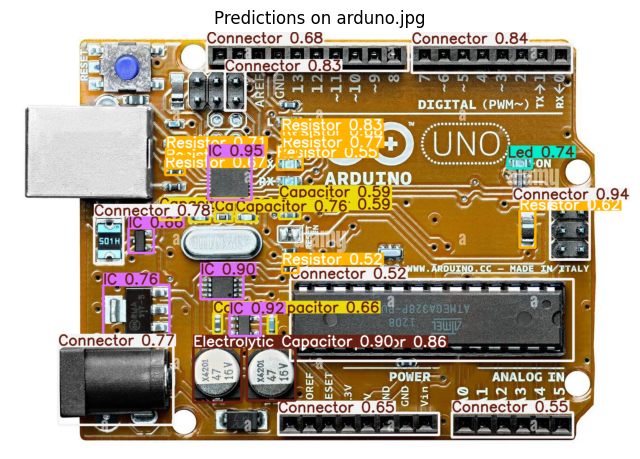


image 1/1 /content/drive/MyDrive/Project3Data/data/evaluation/rasppi.jpg: 640x928 10 Capacitors, 6 Connectors, 1 Electrolytic Capacitor, 6 ICs, 1 Led, 2 Resistors, 8.8ms
Speed: 9.9ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 928)
Results saved to runs/detect/pcb_component_detector27


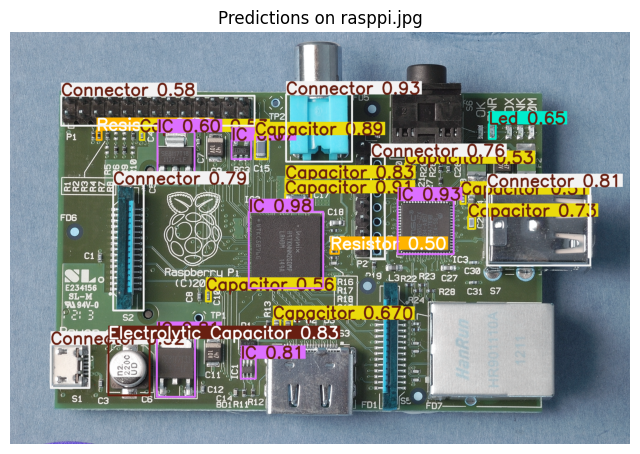

Evaluation and display of processed images completed.


In [15]:
# Import necessary module
import matplotlib.pyplot as plt

# Define the test image paths
test_image_paths = [
    '/content/drive/MyDrive/Project3Data/data/evaluation/ardmega.jpg',
    '/content/drive/MyDrive/Project3Data/data/evaluation/arduno.jpg',
    '/content/drive/MyDrive/Project3Data/data/evaluation/rasppi.jpg'
]

# Evaluate and display predictions
for image_path in test_image_paths:
    # Perform prediction on the image
    results = model.predict(source=image_path, conf=0.5, save=True)  # Confidence threshold at 0.5

    # Loop through each result in the results list
    for result in results:
        # Display processed image with predictions
        plt.figure(figsize=(8, 8))  # Adjust figure size as needed
        plt.imshow(result.plot())  # Use `plot` method to display predictions
        plt.axis('off')  # Turn off axis for better visualization
        plt.title(f"Predictions on {image_path.split('/')[-1]}")  # Title for the image

        plt.show()

print("Evaluation and display of processed images completed.")
